In [1]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.model_selection import train_test_split # used for splitting training and testing data
import seaborn as sns # Seaborn visualization library
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
train = pd.read_csv('VehicleLoan.csv') # to import the train dataset into a variable

In [3]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
train.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

import pandas_profiling  
pandas_profiling.ProfileReport(train) # to get a profiling report 

In [5]:
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [6]:
train.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [7]:
train.shape

(233154, 41)

In [8]:
train=train.drop(['MobileNo_Avl_Flag','UniqueID'],axis=1)

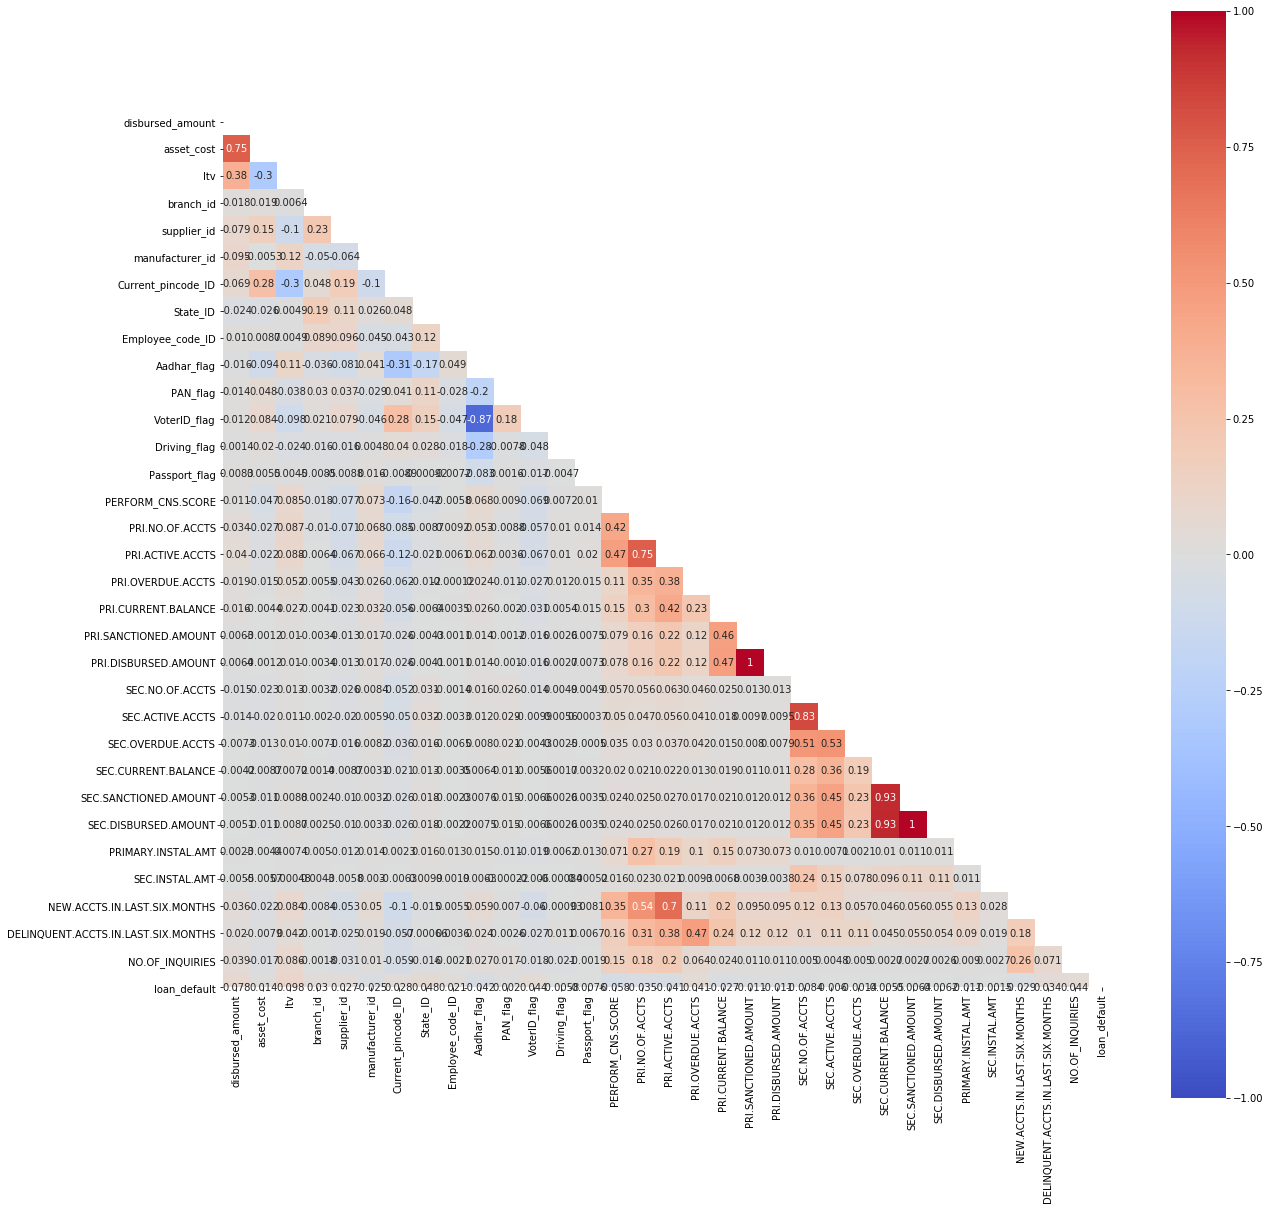

In [9]:
# to get a correlation plot of the dataset using seaborn library
corr = train.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(
    corr, mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    annot=True,
    square=True
)

### Data Pre-Processing 

In [10]:
train=train.drop(['branch_id','supplier_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID'],axis=1)

In [11]:
train['asset_cost']=train['asset_cost'].apply(lambda x:np.log(x))
train['disbursed_amount']=train['disbursed_amount'].apply(lambda x:np.log(x))

In [13]:
pres_date='01-01-20' # Present date

def days_between(d1,d2):
    d1=datetime.strptime(d1,'%d-%m-%y')
    d2=datetime.strptime(d2,'%d-%m-%y')
    return abs((d2-d1).days)

In [14]:
train['Date.of.Birth']=train['Date.of.Birth'].apply(lambda x:days_between(x,pres_date)/365) # converting date of birth in years
train['DisbursalDate']=train['DisbursalDate'].apply(lambda x:days_between(x,pres_date)/365) # converting disbursed date to the present date

In [15]:
train['Employment.Type']=train['Employment.Type'].fillna('unknown')
train=train.drop(['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag'],axis=1)

In [17]:
train.loc[:,'No of Accounts'] = train['PRI.NO.OF.ACCTS'] + train['SEC.NO.OF.ACCTS']
train.loc[:,'PRI Inactive accounts'] = train['PRI.NO.OF.ACCTS'] - train['PRI.ACTIVE.ACCTS']
train.loc[:,'SEC Inactive accounts'] = train['SEC.NO.OF.ACCTS'] - train['SEC.ACTIVE.ACCTS']
train.loc[:,'Total Inactive accounts'] = train['PRI Inactive accounts'] + train['SEC Inactive accounts']
train.loc[:,'Total Overdue Accounts'] = train['PRI.OVERDUE.ACCTS'] + train['SEC.OVERDUE.ACCTS']
train.loc[:,'Total Current Balance'] = train['PRI.CURRENT.BALANCE'] + train['SEC.CURRENT.BALANCE']
train.loc[:,'Total Sanctioned Amount'] = train['PRI.SANCTIONED.AMOUNT'] + train['SEC.SANCTIONED.AMOUNT']
train.loc[:,'Total Disbursed Amount'] = train['PRI.DISBURSED.AMOUNT'] + train['SEC.DISBURSED.AMOUNT']
train.loc[:,'Total Installment'] = train['PRIMARY.INSTAL.AMT'] + train['SEC.INSTAL.AMT']

In [18]:
train=train.drop(['PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS','PRI.CURRENT.BALANCE','PRI Inactive accounts','SEC Inactive accounts',
            'PRI.SANCTIONED.AMOUNT','SEC.NO.OF.ACCTS','PRI.NO.OF.ACCTS','PRI.DISBURSED.AMOUNT','PRI.ACTIVE.ACCTS', 
            'PRI.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT', 'SEC.OVERDUE.ACCTS',
            'SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','SEC.ACTIVE.ACCTS'],axis=1)

In [19]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [20]:
train['AVERAGE.ACCT.AGE'] = train['AVERAGE.ACCT.AGE'].apply(duration)
train['CREDIT.HISTORY.LENGTH'] = train['CREDIT.HISTORY.LENGTH'].apply(duration)
#train.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],axis=1,inplace=True)

In [21]:
train.head()

,disbursed_amount,asset_cost,ltv,manufacturer_id,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,...,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,No of Accounts,Total Inactive accounts,Total Overdue Accounts,Total Current Balance,Total Sanctioned Amount,Total Disbursed Amount,Total Installment
0,10.831272,10.975071,89.55,45,36.024658,Salaried,1.413699,0,No Bureau History Available,0,...,0,0,0,0,0,0,0,0,0,0
1,10.760983,11.090568,73.23,45,34.443836,Self employed,1.265753,598,I-Medium Risk,0,...,23,0,1,1,0,1,27600,50200,50200,1991
2,10.883279,11.024513,89.63,45,34.378082,Self employed,1.419178,0,No Bureau History Available,0,...,0,0,0,0,0,0,0,0,0,0
3,10.959766,11.099121,88.48,45,26.021918,Self employed,1.183562,305,L-Very High Risk,0,...,15,1,1,3,3,0,0,0,0,31
4,10.866242,11.007087,88.39,45,42.090411,Self employed,1.265753,0,No Bureau History Available,0,...,0,1,1,0,0,0,0,0,0,0


In [22]:
train=train.drop(['PERFORM_CNS.SCORE.DESCRIPTION'],axis=1)

In [23]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
train['Employment.Type']= label_encoder.fit_transform(train['Employment.Type'])  

In [24]:
train.columns.get_loc("Total Installment")

20

In [25]:
y=train['loan_default']
X=train.drop(['loan_default'],axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting the model 

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred=lr.predict(X_test) # Predicting the Test set results

In [30]:
print('train accuracy :',lr.score(X_train,y_train))
print('test accuracy :',lr.score(X_test,y_test))

train accuracy : 0.7823406627970149
test accuracy : 0.7831666352141914
